In [20]:
import pandas as pd

import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr

In [2]:
CancerData = pd.read_excel('Project_Data/cancer patient data sets.xlsx')


In [3]:
CancerData.head

<bound method NDFrame.head of     Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0           P1   33       1              2            4             5   
1          P10   17       1              3            1             5   
2         P100   35       1              4            5             6   
3        P1000   37       1              7            7             7   
4         P101   46       1              6            8             7   
..         ...  ...     ...            ...          ...           ...   
995       P995   44       1              6            7             7   
996       P996   37       2              6            8             7   
997       P997   25       2              4            5             6   
998       P998   18       2              6            8             7   
999       P999   47       1              6            5             6   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0            

In [4]:
CancerData.columns

Index(['Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

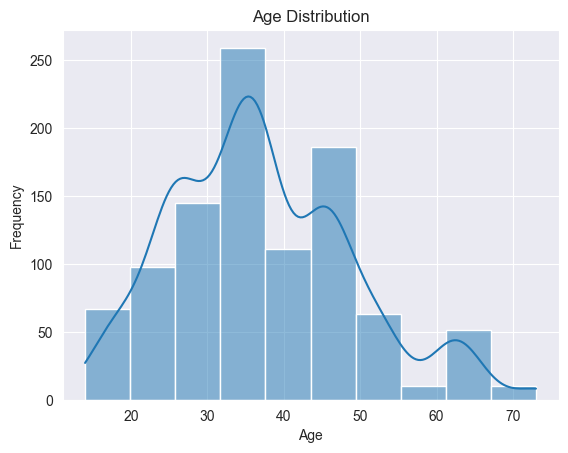

In [5]:
sns.histplot(CancerData['Age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


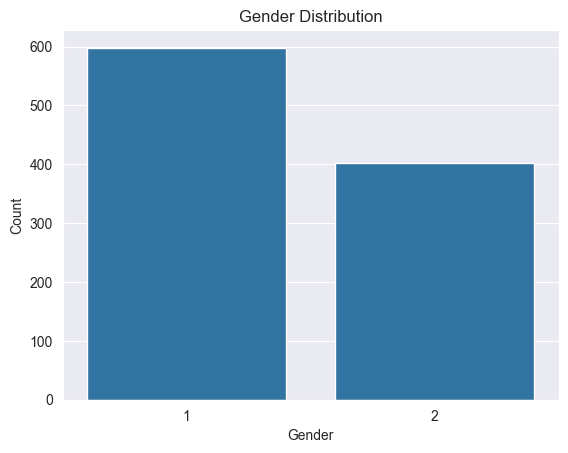

In [6]:
sns.countplot(x='Gender', data=CancerData)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


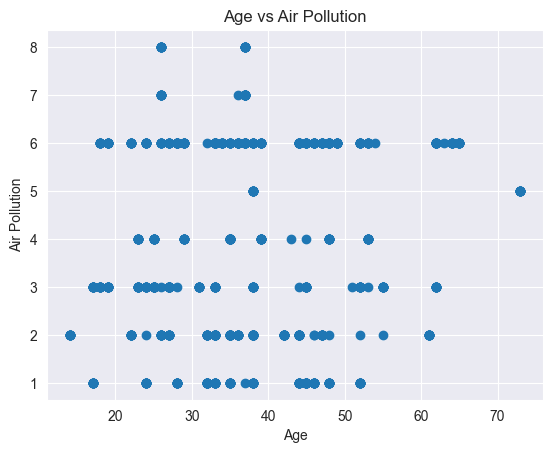

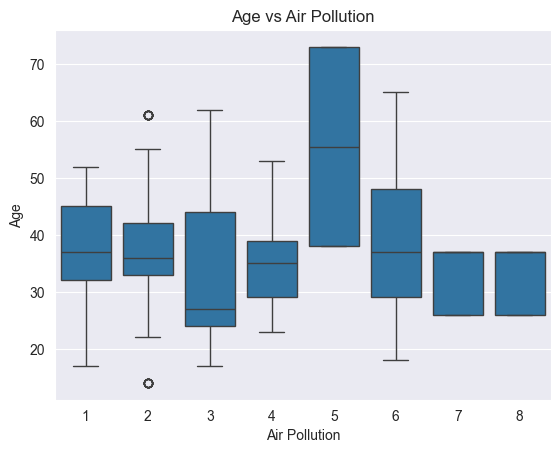

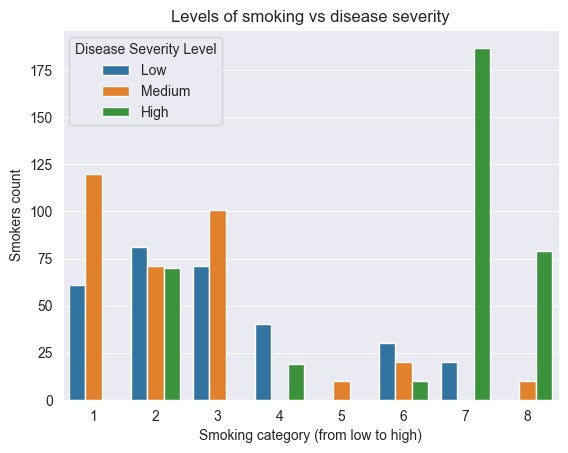

In [7]:
plt.scatter(CancerData['Age'], CancerData['Air Pollution'])
plt.title('Age vs Air Pollution')
plt.xlabel('Age')
plt.ylabel('Air Pollution')
plt.show()

sns.boxplot(x = CancerData['Air Pollution'], y = CancerData['Age'])
plt.title('Age vs Air Pollution')
plt.ylabel('Age')
plt.xlabel('Air Pollution')
plt.show()

sns.countplot(x = CancerData['Smoking'], hue = CancerData['Level'], )
plt.title('Levels of smoking vs disease severity')
plt.legend(title='Disease Severity Level')
plt.xlabel('Smoking category (from low to high)')
plt.ylabel('Smokers count')
plt.show()

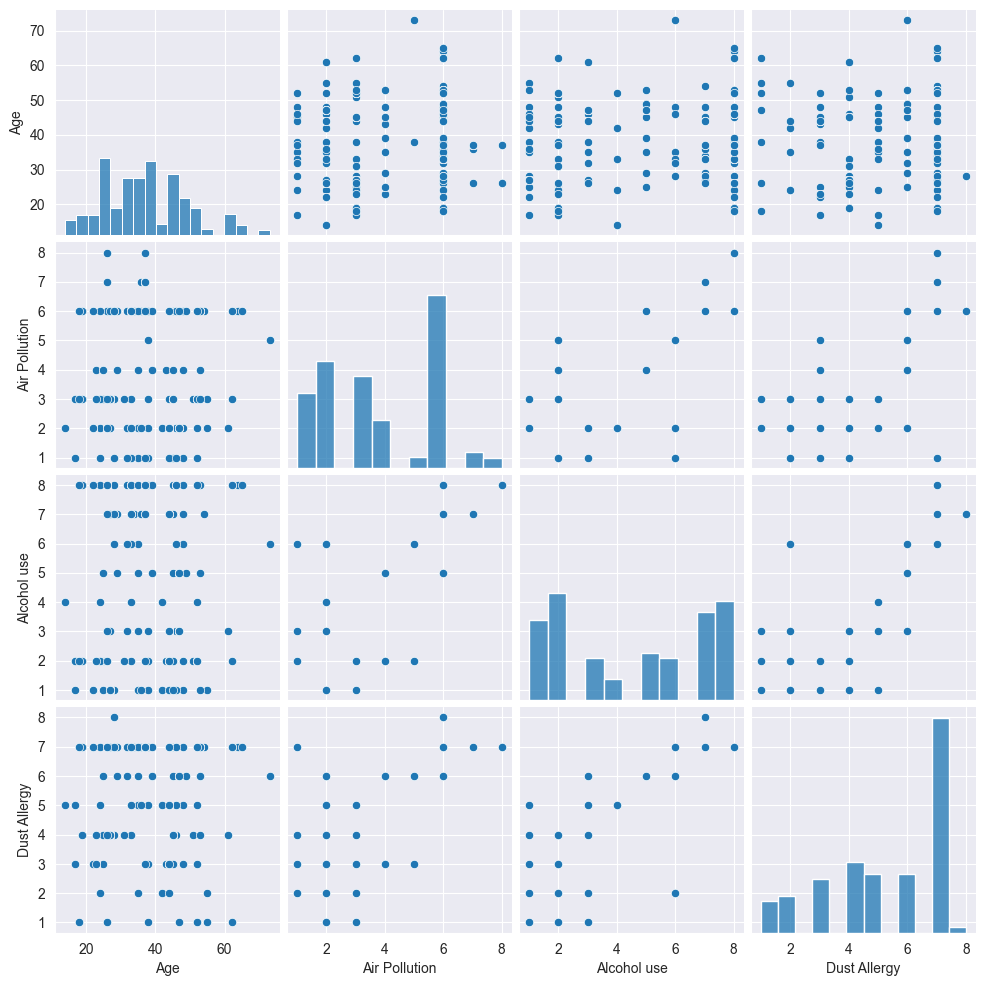

In [8]:
sns.pairplot(CancerData[['Age', 'Air Pollution', 'Alcohol use', 'Dust Allergy']])
plt.show()


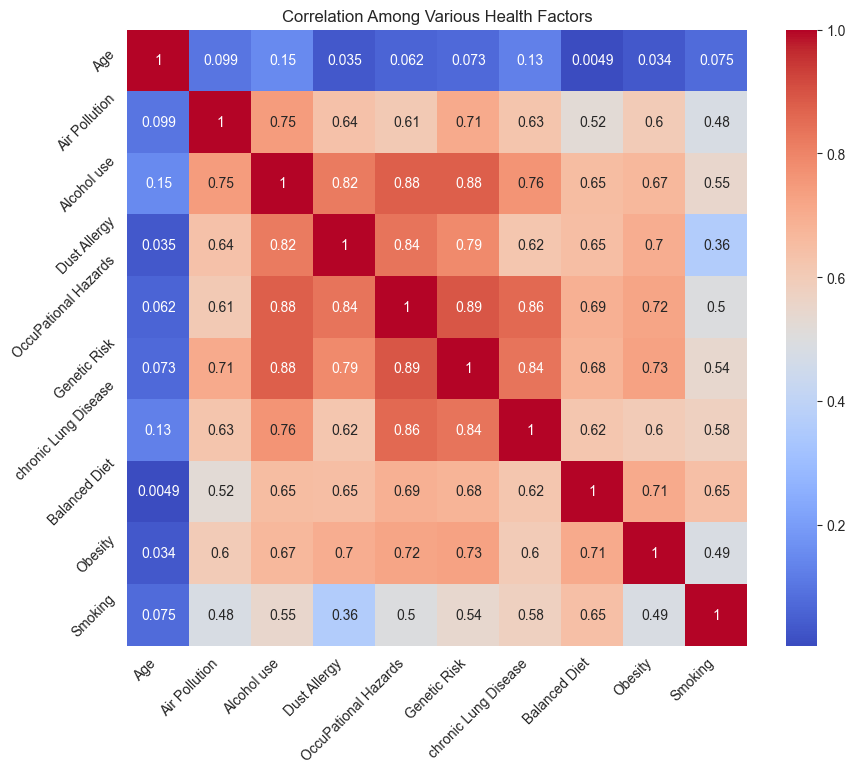

In [9]:
plt.figure(figsize=(10, 8))
corr = CancerData[['Age', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Among Various Health Factors')
plt.xticks(rotation=45, ha='right')  # Improve readability of x-axis labels
plt.yticks(rotation=45)  # Improve readability of y-axis labels
plt.show()


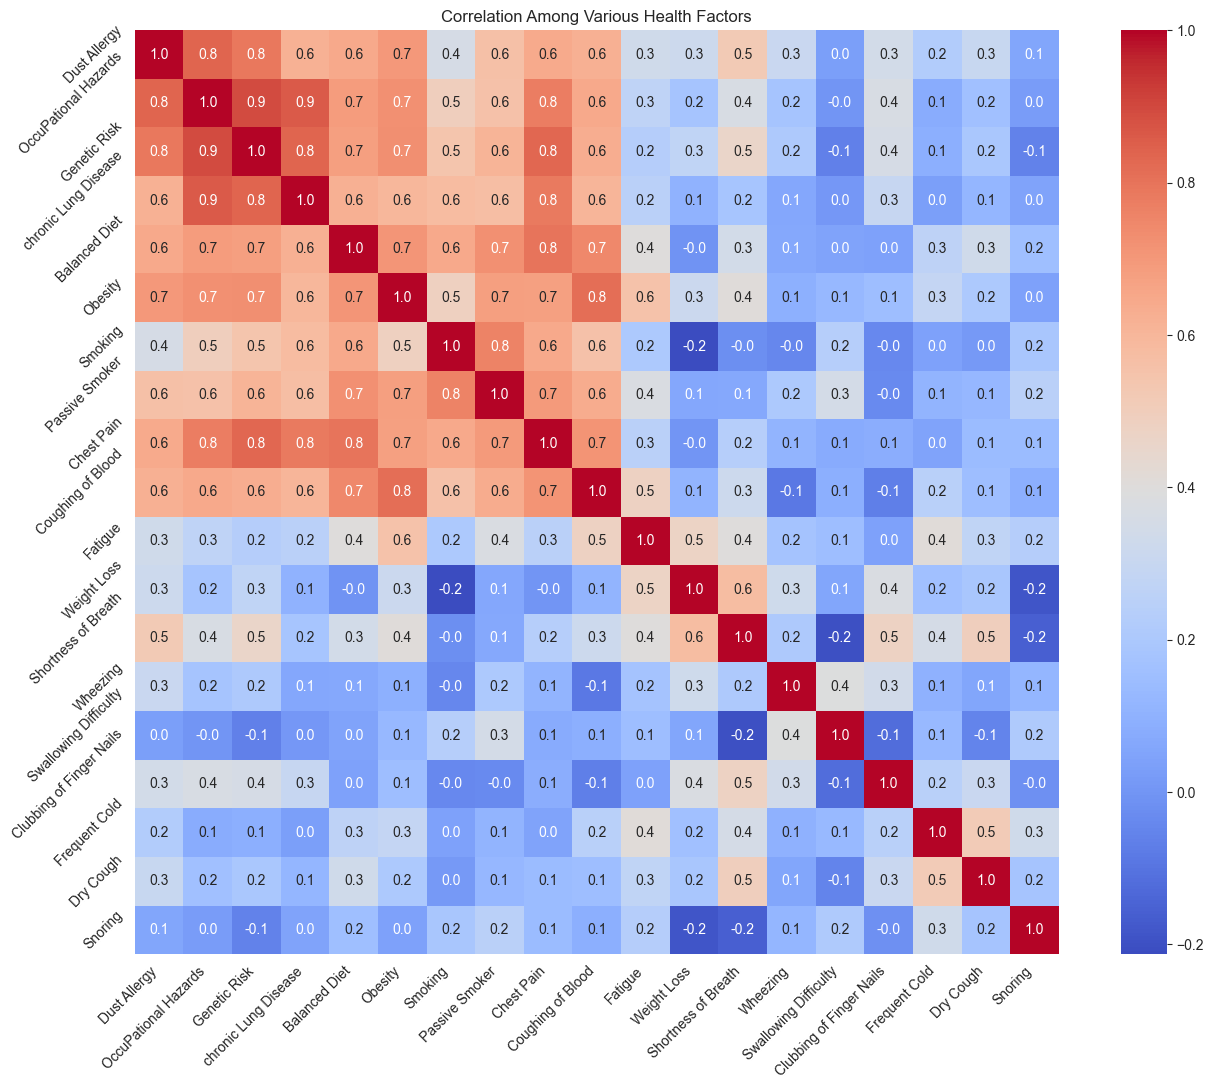

In [36]:
plt.figure(figsize=(16, 12))  # Increased figure size for readability with more variables
corr = CancerData[['Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
                   'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
                   'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
                   'Weight Loss', 'Shortness of Breath', 'Wheezing',
                   'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
                   'Dry Cough', 'Snoring']].corr()  # Selected all listed attributes
sns.heatmap(corr, annot=True, fmt='.1f', cmap='coolwarm', square=True)
plt.title('Correlation Among Various Health Factors')
plt.xticks(rotation=45, ha='right')  # Improve readability of x-axis labels
plt.yticks(rotation=45)  # Improve readability of y-axis labels
plt.show()


In [21]:
corr = CancerData.corr()  # Computes the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='viridis', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

ValueError: could not convert string to float: 'P1'

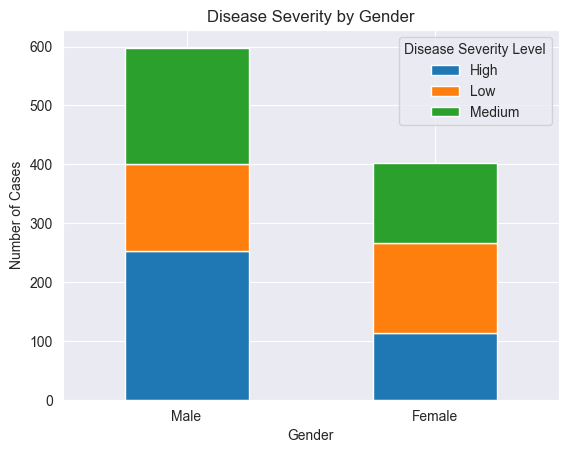

In [10]:
# more tables
pd.crosstab(CancerData['Gender'], CancerData['Level']).plot(kind='bar', stacked=True)
plt.title('Disease Severity by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Cases')
plt.xticks([0, 1], ['Male', 'Female'], rotation=0)  # Adjust as necessary
plt.legend(title='Disease Severity Level')
plt.show()


In [11]:
print(CancerData.isnull().values.any())

False


In [12]:
print(CancerData.isnull().sum())


Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64


In [15]:
CancerData.isnull().sum()

Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

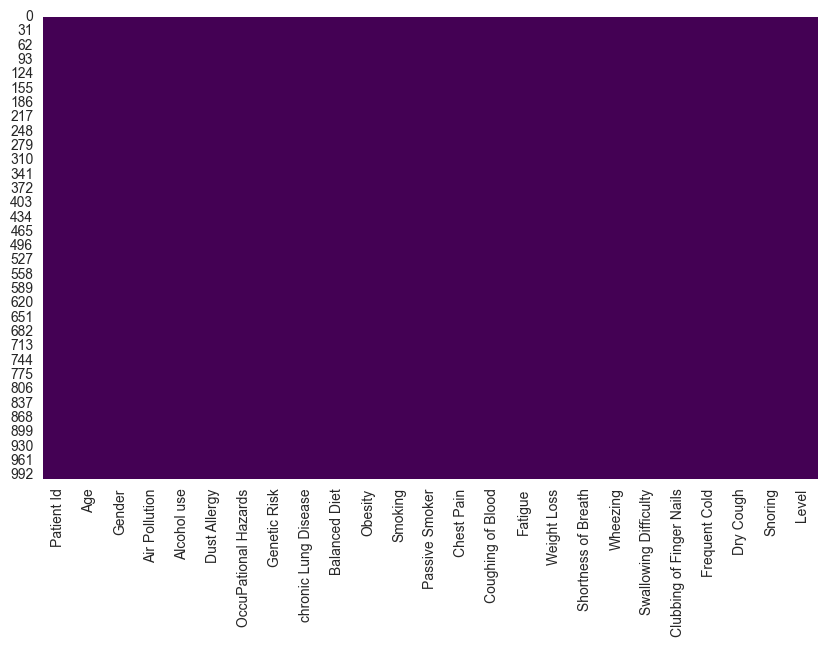

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(CancerData.isnull(), cbar=False, cmap='viridis')
plt.show()


In [23]:
from scipy.stats import pearsonr
import pandas as pd

# Assuming CancerData is your DataFrame
significant_corrs_list = []  # Use a list to collect rows

for col1 in CancerData.select_dtypes(include=['float64', 'int64', 'int32']).columns:
    for col2 in CancerData.select_dtypes(include=['float64', 'int64', 'int32']).columns:
        if col1 != col2:
            corr_coef, p_value = pearsonr(CancerData[col1].dropna(), CancerData[col2].dropna())
            if p_value < 0.05:  # Adjust your significance level here
                significant_corrs_list.append({
                    'Variable 1': col1,
                    'Variable 2': col2,
                    'Correlation Coefficient': corr_coef,
                    'P-Value': p_value
                })

# Convert the list of dicts to a DataFrame
significant_corrs = pd.DataFrame(significant_corrs_list)

print(significant_corrs.sort_values('P-Value'))


                Variable 1             Variable 2  Correlation Coefficient  \
94    OccuPational Hazards           Genetic Risk                 0.893049   
114           Genetic Risk   OccuPational Hazards                 0.893049   
92    OccuPational Hazards            Alcohol use                 0.878786   
52             Alcohol use   OccuPational Hazards                 0.878786   
112           Genetic Risk            Alcohol use                 0.877210   
..                     ...                    ...                      ...   
216         Passive Smoker    Shortness of Breath                 0.062948   
126           Genetic Risk  Swallowing Difficulty                -0.062948   
340  Swallowing Difficulty           Genetic Risk                -0.062948   
3                      Age   OccuPational Hazards                 0.062177   
89    OccuPational Hazards                    Age                 0.062177   

           P-Value  
94    0.000000e+00  
114   0.000000e+00  


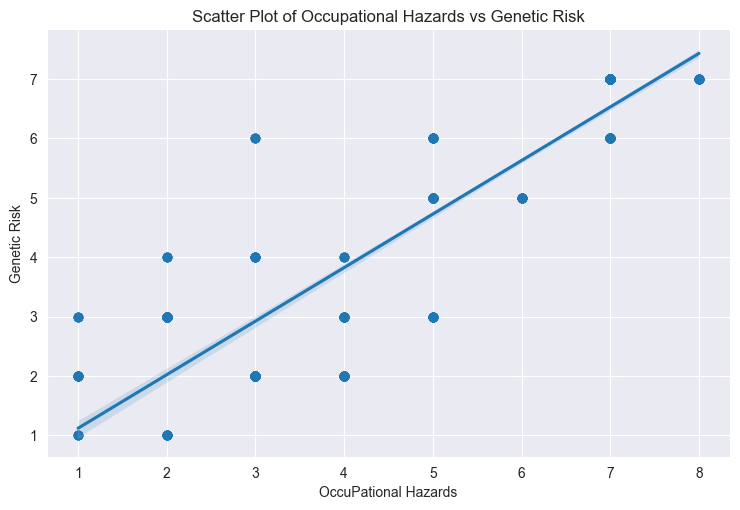

In [25]:
sns.lmplot(x='OccuPational Hazards', y='Genetic Risk', data=CancerData, aspect=1.5, scatter_kws={'alpha':0.5})
plt.title('Scatter Plot of Occupational Hazards vs Genetic Risk')
plt.show()


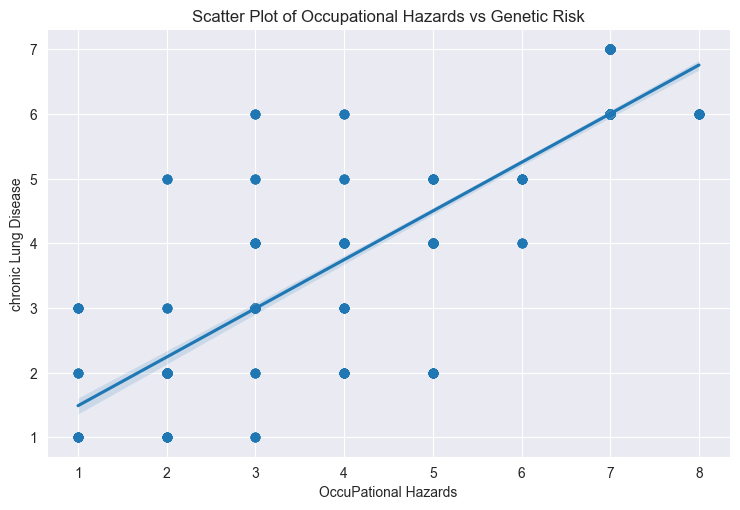

In [31]:

sns.lmplot(x='OccuPational Hazards', y='chronic Lung Disease', data=CancerData, aspect=1.5, scatter_kws={'alpha': 0.5})
plt.title('Scatter Plot of Occupational Hazards vs Genetic Risk')
plt.show()

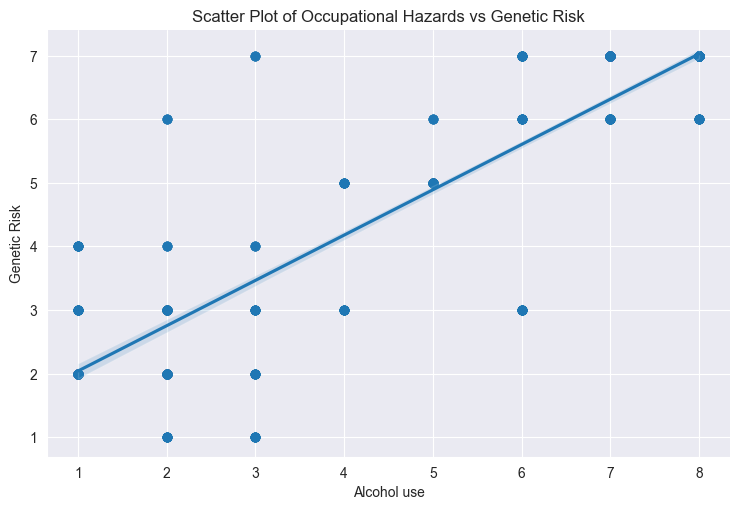

In [34]:

sns.lmplot(x='Alcohol use', y='Genetic Risk', data=CancerData, aspect=1.5, scatter_kws={'alpha': 0.5})
plt.title('Scatter Plot of Occupational Hazards vs Genetic Risk')
plt.show()

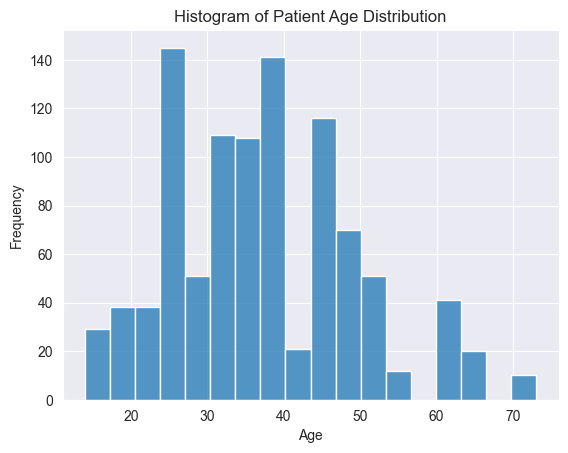

In [26]:
# Assuming 'Age' is your column name
sns.histplot(CancerData['Age'], kde=False)
plt.title('Histogram of Patient Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
